In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.optimize as optim
from scipy import sparse
from matplotlib import pylab
plt.style.use('willo')

In [2]:
import matplotlib as mpl

cmapp = mpl.colors.LinearSegmentedColormap.from_list('my_cmap',['blue','black'],256)
cmapp._init()
alphas = np.linspace(0, 1, cmapp.N+3)
cmapp._lut[:,-1] = alphas

In [3]:
def model_func(x,c0,cu):
    return c0+cu*x

In [4]:
gang = pd.read_csv('../data/data_big_sep2015/gang_data.csv')
gang['Timestamp']=pd.to_datetime([val.rsplit('-',1)[0] for val in gang['Timestamp']])

In [23]:
u_tot = np.zeros(gang['Timestamp'].shape)
r_tot = np.zeros(gang['Timestamp'].shape)
save_hist = np.zeros((gang['Timestamp'].shape[0],17))
save_hist_pernode = []
stackit = []
u=[]
r=[]
n = 0
# for just sandyb
# for index in (i for j in (range(33,37),range(69,75),range(77,113),range(193,227),range(249,263),range(304,339),range(341,377),range(379,415),range(438,453),range(455,467),range(495,511)) for i in j):
for index in (i for j in (range(33,37),range(69,75),range(77,113),range(193,227),range(249,263),range(304,339),range(341,377),range(379,415),range(438,453),range(455,467),range(495,511)) for i in j):

# for index in range(1,700):
    
    pick = 'midway'+str(index).zfill(3)
    sub = pick+'|Timestamp'  
    subgang = gang.filter(regex=sub)
    subgang.columns=["".join(col.lstrip(pick).split()) for col in subgang.columns]
    
    if('domain_a_avgpwr' in subgang):
        n = n+1
        val = subgang['domain_a_avgpwr'].values
        if(index % 2 ==0):
            val = subgang['domain_b_avgpwr'].values
        val[np.isnan(val)]=0
        u_tot = u_tot + val
        u.extend(val)
        val = subgang['cpu_user'].values/100.+subgang['cpu_system']/100.
        val[np.isnan(val)]=0
        r_tot = r_tot + val
        r.extend(val)
            
u=np.array(u)
r=np.array(r)

In [24]:
c_params = optim.curve_fit(model_func,r,u,np.array([0.0,0.0]))
print c_params

(array([  76.24632777,  185.57455768]), array([[ 0.00749853, -0.00888813],
       [-0.00888813,  0.01640389]]))


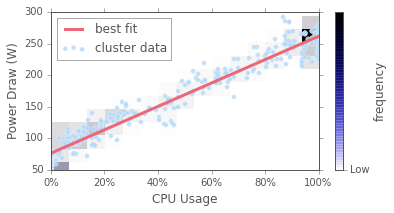

In [25]:
plt.figure(figsize=(6, 3))
rndind = np.random.choice(len(u),500)
H, xedges, yedges = np.histogram2d(r,u,bins=15)
myim = (H.T)
myim[np.isinf(myim)]=0
plt.scatter(r[rndind],u[rndind],c='#add9fe',label="cluster data",alpha=0.8)
im = plt.imshow(myim, interpolation='nearest', origin='low',
                extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],aspect='auto',cmap=cmapp)
rng = np.linspace(0,1,50);
plt.plot(rng,c_params[0][0]+c_params[0][1]*rng,lw=3,c='#ec6778',label="best fit")
plt.gca().set_xlim([0,1])
plt.gca().set_xticklabels(['0%','20%','40%','60%','80%','100%'])
plt.gca().set_ylim([50,300])
plt.ylabel('Power Draw (W)')
plt.xlabel('CPU Usage')
cbar = plt.colorbar(im, ticks=[0,40000], label='frequency')
cbar.ax.set_yticklabels(['Low', 'High'])
plt.legend(loc=2)
plt.gcf().subplots_adjust(bottom=0.17)
plt.savefig("../figures/pwr_proc.pdf", format='pdf', dpi=1000)

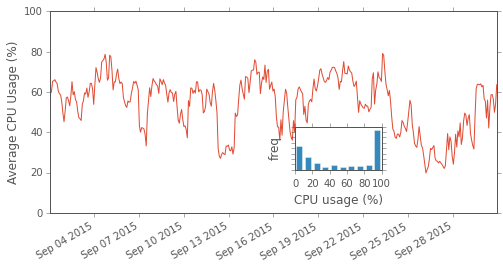

In [26]:
fig = plt.figure(figsize=(8, 4))
plt.plot(subgang['Timestamp'],r_tot/n*100)
plt.ylim([0, 100])
plt.ylabel('Average CPU Usage (%)')
fig.autofmt_xdate()

ax_inset=fig.add_axes([0.55,0.35,0.15,0.15])
hist, bins = np.histogram(r*100, bins=10,density=True)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
ax_inset.bar(center, hist, align='center', width=width)
ax_inset.set_xlim([0,100])
ax_inset.set_xlabel('CPU usage (%)')
ax_inset.set_ylabel('freq')
ax_inset.set_yticklabels([])
plt.savefig("../figures/pwr_model_ins.pdf", format='pdf', dpi=1000)


In [43]:
graph = pd.read_csv('../data/grafana_data_export.csv',skiprows=1,header=None,sep=';')
graph[1]=pd.to_datetime(graph[1])

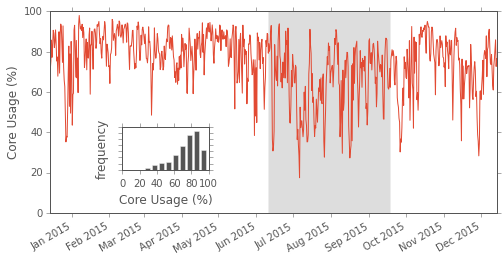

In [87]:
fig = plt.figure(figsize=(8, 4))
plt.plot(graph[1],graph[2])
plt.ylim([0, 100])
plt.ylabel('Core Usage (%)')
fig.autofmt_xdate()

from matplotlib.patches import Rectangle
someX, someY = graph[1][376], 0
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((someX, someY), 100, 100, facecolor="#DDDDDD"))

ax_inset=fig.add_axes([0.25,0.35,0.15,0.15])
hist, bins = np.histogram(graph[2], bins=10,density=True)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
ax_inset.bar(center, hist, align='center', width=width,color="#555555")
ax_inset.set_xlim([0,100])
ax_inset.set_xlabel('Core Usage (%)')
ax_inset.set_ylabel('frequency')
ax_inset.set_yticklabels([])
plt.savefig("../figures/pwr_model_ins.pdf", format='pdf', dpi=1000)

In [88]:
np.mean(graph[2][1:376])

80.72195966833137

In [79]:
np.mean(graph[2][376:600])

65.41510558335568

In [81]:
graph[1][600]

Timestamp('2015-09-24 00:40:00')

In [90]:
n

244